In [ ]:
pip install NPTFit

In [2]:
import numpy as np
import healpy as hp

from NPTFit import create_mask as cm # Module for creating masks

In [9]:
raw_data=np.load('/content/drive/MyDrive/Copy of cl_planck_lensed.npy')

ll = raw_data[ :,0]
cl = raw_data[ :,1]

hp.sphtfunc.synfast(cl,32)
raw_map=hp.sphtfunc.synfast(cl, nside=128)

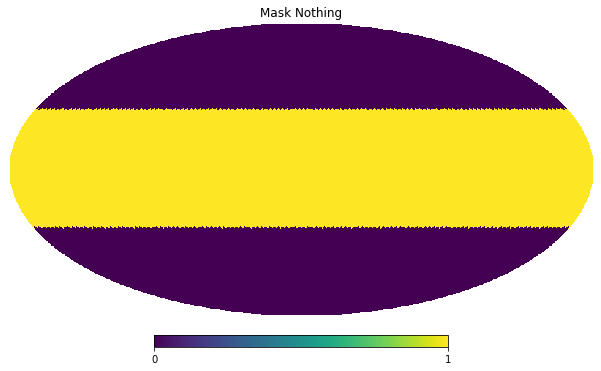

In [7]:
example1 = cm.make_mask_total(nside=32 , band_mask=True)
hp.mollview(example1,title='Mask Nothing', cbar=True, min=0,max=1)

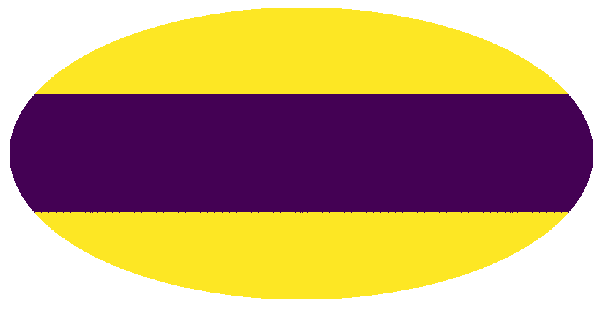

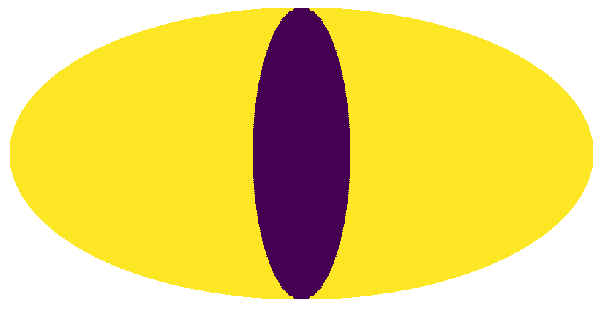

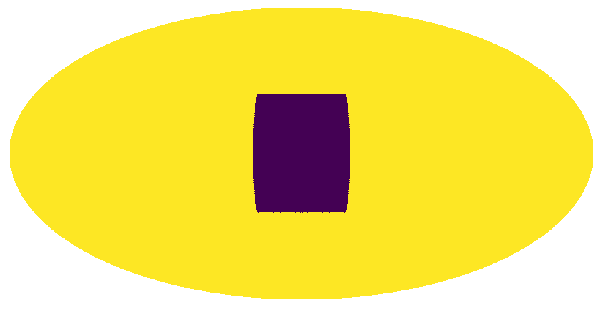

In [8]:
example3a = cm.make_mask_total(l_mask = False, l_deg_min = -30, l_deg_max = 30,
                               b_mask = True, b_deg_min = -30, b_deg_max = 30)
hp.mollview(example3a,title='',cbar=False,min=0,max=1)

example3b = cm.make_mask_total(l_mask = True, l_deg_min = -30, l_deg_max = 30,
                               b_mask = False, b_deg_min = -30, b_deg_max = 30)
hp.mollview(example3b,title='',cbar=False,min=0,max=1)

example3c = cm.make_mask_total(l_mask = True, l_deg_min = -30, l_deg_max = 30,
                              b_mask = True, b_deg_min = -30, b_deg_max = 30)
hp.mollview(example3c,title='',cbar=False,min=0,max=1)

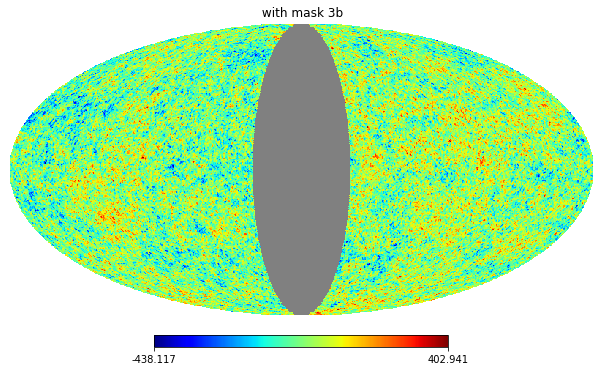

In [13]:
map_masked3b = hp.ma(raw_map)
map_masked.mask3b = np.logical_not(example3b)

hp.mollview(map_masked, title= ' with mask 3b', cmap='jet')

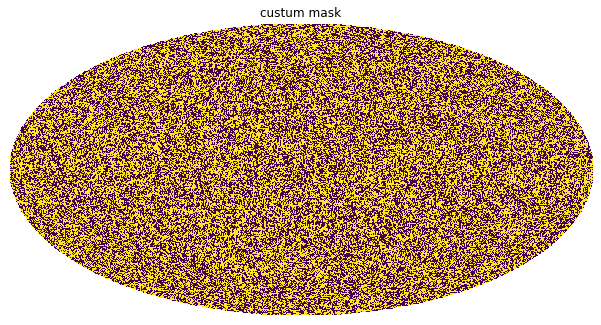

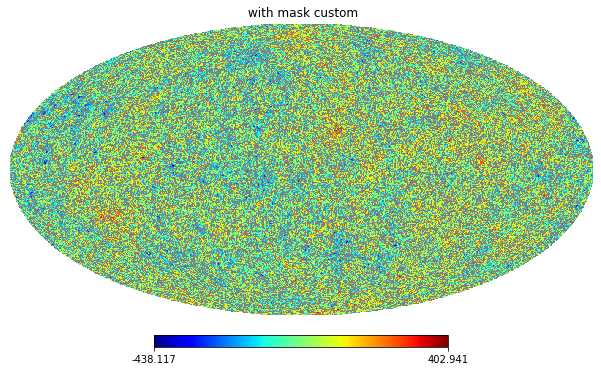

In [20]:
random_custom_mask = np.random.choice(np.array([True, False]), hp.nside2npix(128))
example5 = cm.make_mask_total(custom_mask = random_custom_mask)
hp.mollview(example5,title='custum mask',cbar=False,min=0,max=1)

map_masked5 = hp.ma(raw_map)
map_masked5.mask = np.logical_not(example5)

hp.mollview(map_masked5, title= ' with mask custom', cmap='jet')

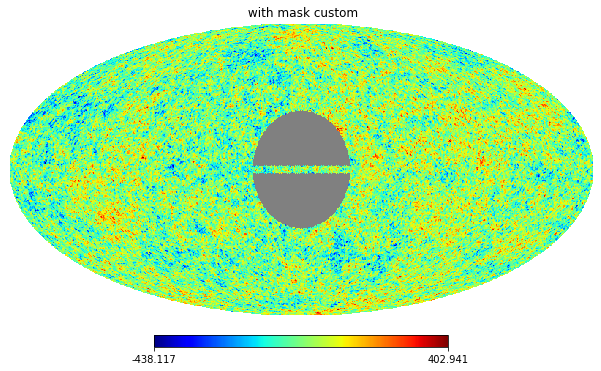

In [28]:
# pscmask=np.array(np.load('fermi_data/fermidata_pscmask.npy'), dtype=bool)
example6 = cm.make_mask_total(band_mask = True, band_mask_range = 2,
                              mask_ring = True, inner = 0, outer = 30)
map_masked6 = hp.ma(raw_map)
test=map_masked6.mask = np.logical_not(example6)

hp.mollview(map_masked6, title= ' with mask custom', cmap='jet')


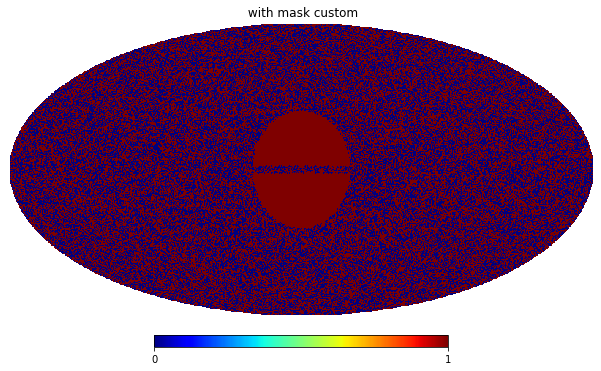

In [31]:
map_masked7 = hp.ma(test)
map_masked7.mask = np.logical_not(example5)

hp.mollview(map_masked7, title= ' with mask custom', cmap='jet')


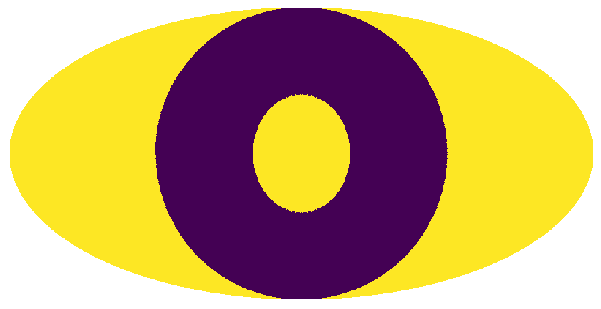

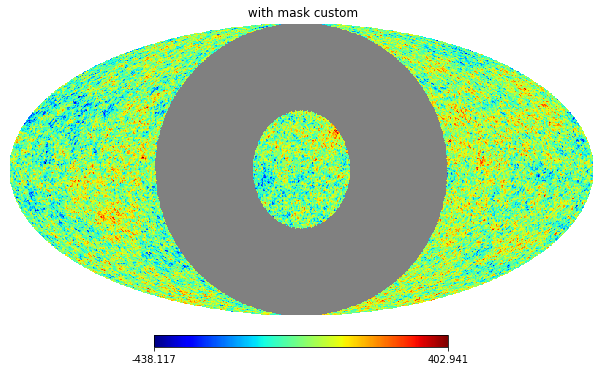

In [33]:
example4c = cm.make_mask_total(mask_ring = True, inner = 30, outer = 90, ring_b = 0, ring_l = 0)
hp.mollview(example4c,title='',cbar=False,min=0,max=1)

map_masked4c = hp.ma(raw_map)
test=map_masked4c.mask = np.logical_not(example4c)

hp.mollview(map_masked4c, title= ' with mask custom', cmap='jet')
